In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Portrait de phase du modèle on_off

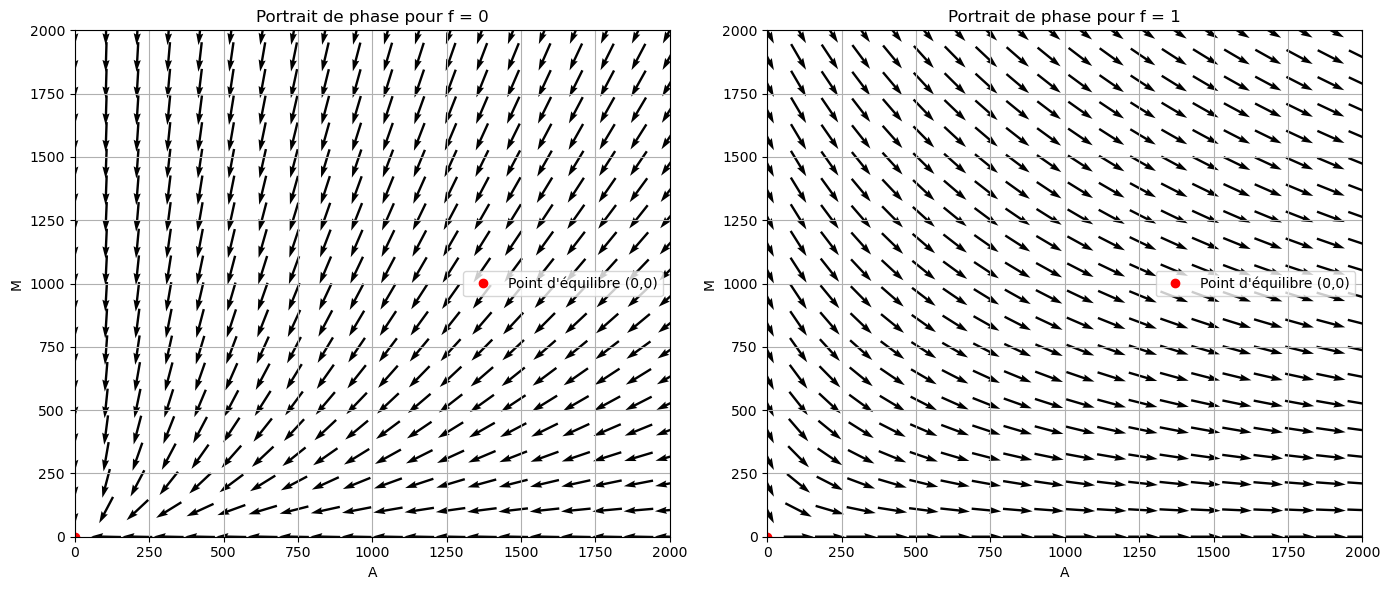

In [7]:
 

# Parametres
T_on = 1.2
T_off = 5.8
rho = 2.9
r = 0.011
alpha = 0.51
delta = 1
a=1
# equations differentielles pour le champ de vecteurs
def dAdt(A, M, f):
    return f * (a * M + rho * A) - (1 - f) * (r + alpha) * A

def dMdt(A, M, f):
    return r * (1 - f) * A - a * f * M - delta * M

# Valeurs de f
f_values = [0, 1]

# Grille pour le portrait de phase
A_vals = np.linspace(0, 2000, 20)
M_vals = np.linspace(0, 2000, 20)
AA, MM = np.meshgrid(A_vals, M_vals)

# Traceé
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, f in zip(axes, f_values):
    # Calcul du champ de vecteurs
    U = dAdt(AA, MM, f)
    V = dMdt(AA, MM, f)
    
    # Normalisation des vecteurs pour que les flèches aient la même longueur
    magnitude = np.sqrt(U**2 + V**2)
    U_norm = U / (magnitude + 1e-8)
    V_norm = V / (magnitude + 1e-8)
    
    # Tracé du champ de vecteurs
    ax.quiver(AA, MM, U_norm, V_norm, color='black', pivot='middle', scale=20, width=0.004)





    # Point d'équilibre
    ax.plot(0, 0, 'ro', label="Point d'équilibre (0,0)")

    # Détails du graphique
    ax.set_xlim(0, 2000)
    ax.set_ylim(0, 2000)
    ax.set_xlabel('A')
    ax.set_ylabel('M')
    ax.set_title(f'Portrait de phase pour f = {f}')
    ax.legend()
    ax.grid(True)
 
plt.tight_layout()
plt.savefig("portrait_phase_on_off.png", dpi=300, bbox_inches='tight')
plt.show()


# Portrait de phase du modèle continu

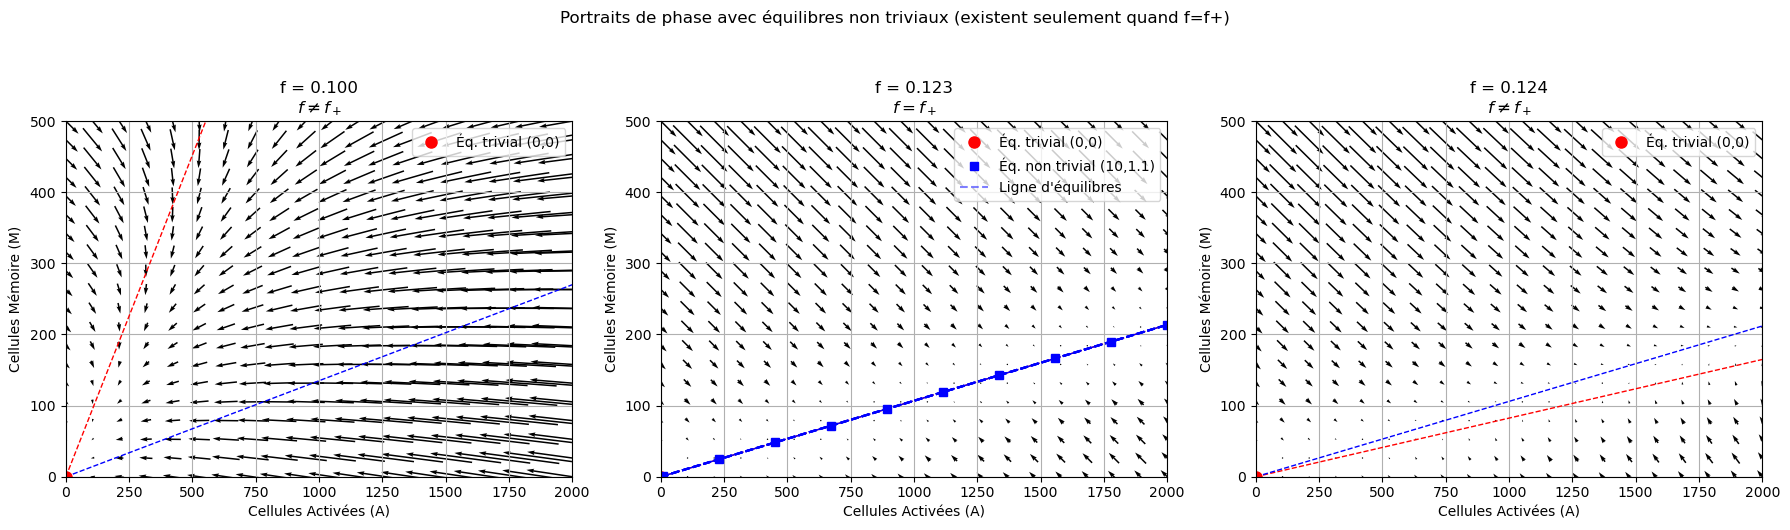

<Figure size 640x480 with 0 Axes>

In [8]:


# --- Paramètres biologiques ---
a = 1.0
rho = 2.92
r = 0.015
alpha = 0.41
sigma_M = 1e-5
#f1=(r+alpha+sigma_M)/(rho+r+alpha-a)

# Calcul de f1 (valeur critique)
numerator = a*alpha - sigma_M*(r + alpha + rho)
denominator = 2*a*(rho + alpha)
discriminant = np.sqrt((sigma_M*(r + alpha + rho) - a*alpha)**2 + 4*a*(rho + alpha)*(r + alpha)*sigma_M)
f1 = (numerator + discriminant) / denominator

# Domaine de tracé
A_max, M_max = 2000,500
n = 20
A = np.linspace(0, A_max, n)
M = np.linspace(0, M_max, n)
AA, MM = np.meshgrid(A, M)

# Fonctions des dérivées
def dAdt(A, M, f):
    return f * (a * M + rho * A) - (1 - f) * (r + alpha) * A

def dMdt(A, M, f):
    return r * (1 - f) * A - (a * f + sigma_M) * M

# Calcul des équilibres non triviaux
def equilibrium_A(f):
    if abs(f - f1) < 1e-6:  # Seulement valable pour f=f1
        return np.linspace(0, A_max, 10)  # Famille de solutions
    else:
        return np.array([])  # Pas de solution non triviale

# Valeurs de f à illustrer
f_values = [0.1,f1 ,0.124 ]

fig, axes = plt.subplots(1, len(f_values), figsize=(18, 5))

    
for ax, f in zip(axes, f_values):
    # Champ de vecteurs
    U = dAdt(AA, MM, f)
    V = dMdt(AA, MM, f)
    ax.quiver(AA, MM, U, V, color='black', pivot='mid', scale=1e3, width=0.003)
        # Nullclines
    # dA/dt = 0 --> M = ((1-f)(r+alpha) - f*rho)/(a*f) * A
    # dM/dt = 0 --> M = [r*(1-f)/(a*f+sigma_M)] * A
    with np.errstate(divide='ignore', invalid='ignore'):
        slope_A = ((1-f)*(r+alpha) - f*rho) / (a*f)
        slope_M = r*(1-f)/(a*f + sigma_M)
    A_line = np.linspace(0, A_max, 200)
    ax.plot(A_line, slope_A * A_line, 'r--', lw=1)
    ax.plot(A_line, slope_M * A_line, 'b--', lw=1)        
    # Point d'équilibre trivial
    ax.plot(0, 0, 'ro', markersize=8, label='Éq. trivial (0,0)')
    # Equilibres non triviaux (uniquement pour &f=f1)
    if abs(f - f1) < 1e-6:
        A_star_values = np.linspace(10, A_max, 10)  # Sélection de quelques points
        for A_star in A_star_values:
            M_star = (r * (1 - f1) * A_star) / (a * f1 + sigma_M)
            ax.plot(A_star, M_star, 'bs', markersize=6, 
                    label=f'Éq. non trivial ({A_star:.0f},{M_star:.1f})' if A_star == A_star_values[0] else "")
            
            # Ligne des équilibres
            A_line = np.linspace(0, A_max, 100)
            M_line = (r * (1 - f1) * A_line) / (a * f1 + sigma_M)
            ax.plot(A_line, M_line, 'b--', alpha=0.5, label='Ligne d\'équilibres' if A_star == A_star_values[0] else "")

    ax.set_title(f'f = {f:.3f}\n' + (r'$f=f_+$' if abs(f-f1)<1e-6 else r'$f\neq f_+$'))
    ax.set_xlabel('Cellules Activées (A)')
    ax.set_ylabel('Cellules Mémoire (M)')
    ax.set_xlim(0, A_max)
    ax.set_ylim(0, M_max)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.suptitle('Portraits de phase avec équilibres non triviaux (existent seulement quand f=f+)', y=1.05)
plt.tight_layout()
plt.show()
plt.savefig("portrait_phase_f06.png", dpi=300, bbox_inches='tight')